# **Tennis Ace Project**



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv("/content/tennis_stats.csv")

In [5]:
df.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [7]:
def ScatterPlots(x_axis, y_axis):
  num_x = len(x_axis)
  num_y = len(y_axis)
  fig, axs = plt.subplots(num_y, num_x, figsize=(num_x * 5, num_y * 5))

  for i, y_ax in enumerate(y_axis):
        for j, x_ax in enumerate(x_axis):
            # Plot on the appropriate subplot
            ax = axs[i, j] if num_y > 1 and num_x > 1 else axs[max(i, j)]
            ax.scatter(df[x_ax], df[y_ax])
            ax.set_title(f"{x_ax} vs {y_ax}")
            ax.set_xlabel(f"{x_ax}")
            ax.set_ylabel(f"{y_ax}")


  plt.tight_layout()
  plt.show()

In [8]:
outcomes = df[[
    "Wins",
    "Losses",
    "Winnings",
    "Ranking"
]].columns

In [9]:
service_side = df[[
    "Aces",
    "DoubleFaults",
    "FirstServe",
    "FirstServePointsWon",
    "SecondServePointsWon",
    "BreakPointsSaved",
    "ServiceGamesPlayed",
    "ServiceGamesWon",
    "TotalServicePointsWon"
]].columns

In [11]:
return_side = df[[
    "FirstServeReturnPointsWon",
    "SecondServeReturnPointsWon",
    "BreakPointsOpportunities",
    "BreakPointsConverted",
    "ReturnGamesPlayed",
    "ReturnGamesWon",
    "ReturnPointsWon",
    "TotalPointsWon"
]].columns

In [13]:
df["PercentageWinsOverTotal"] = df.Wins/(df.Wins + df.Losses)

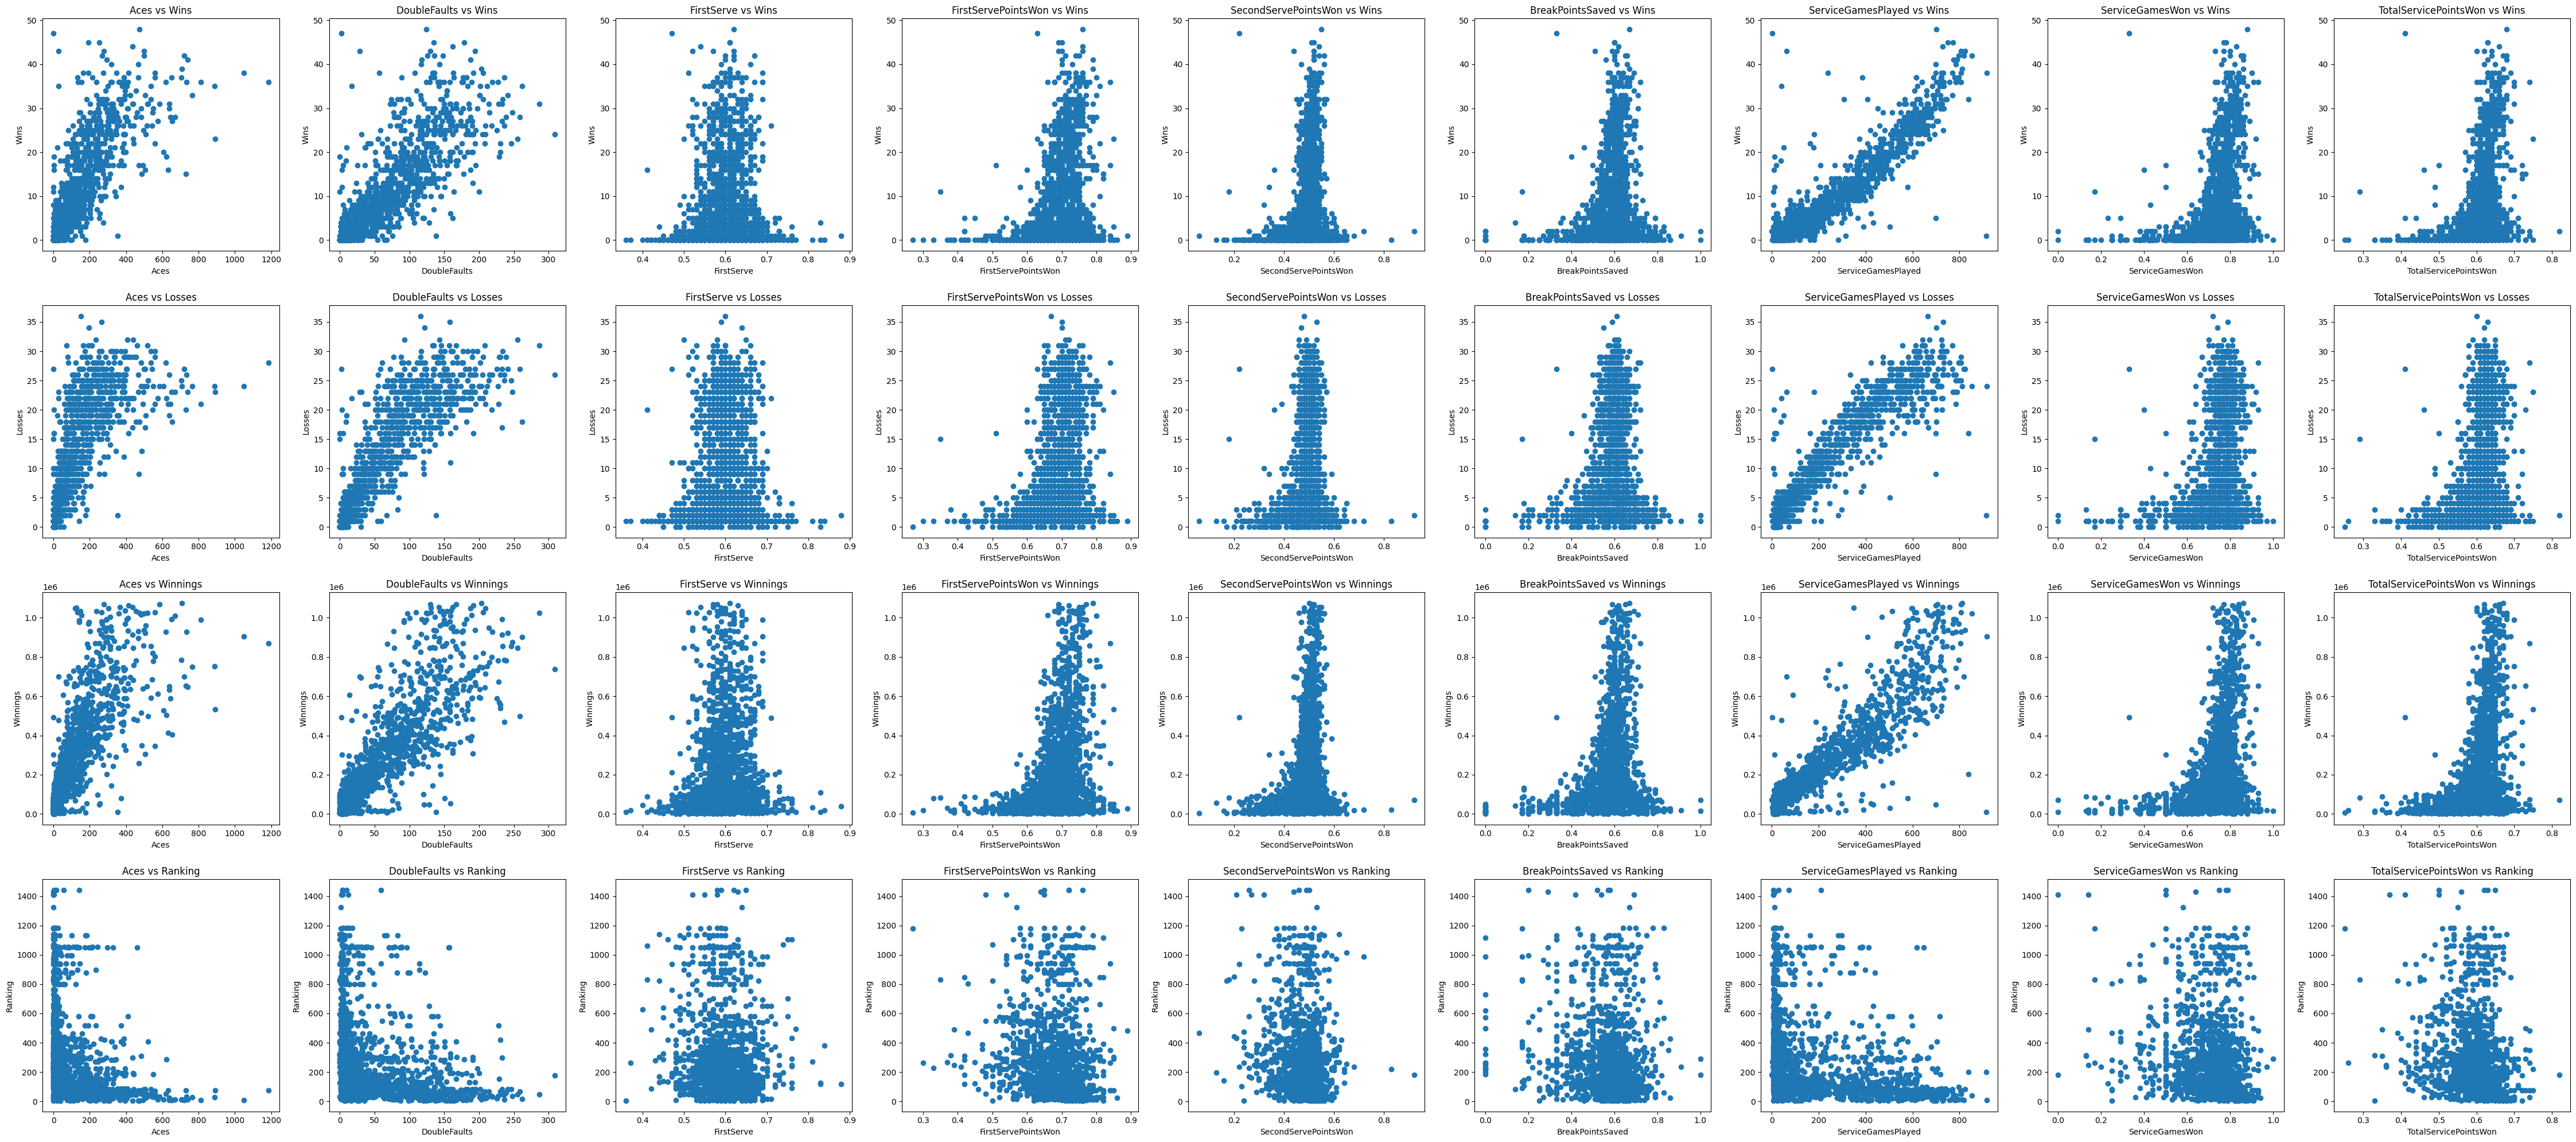

In [10]:
ScatterPlots(service_side, outcomes)

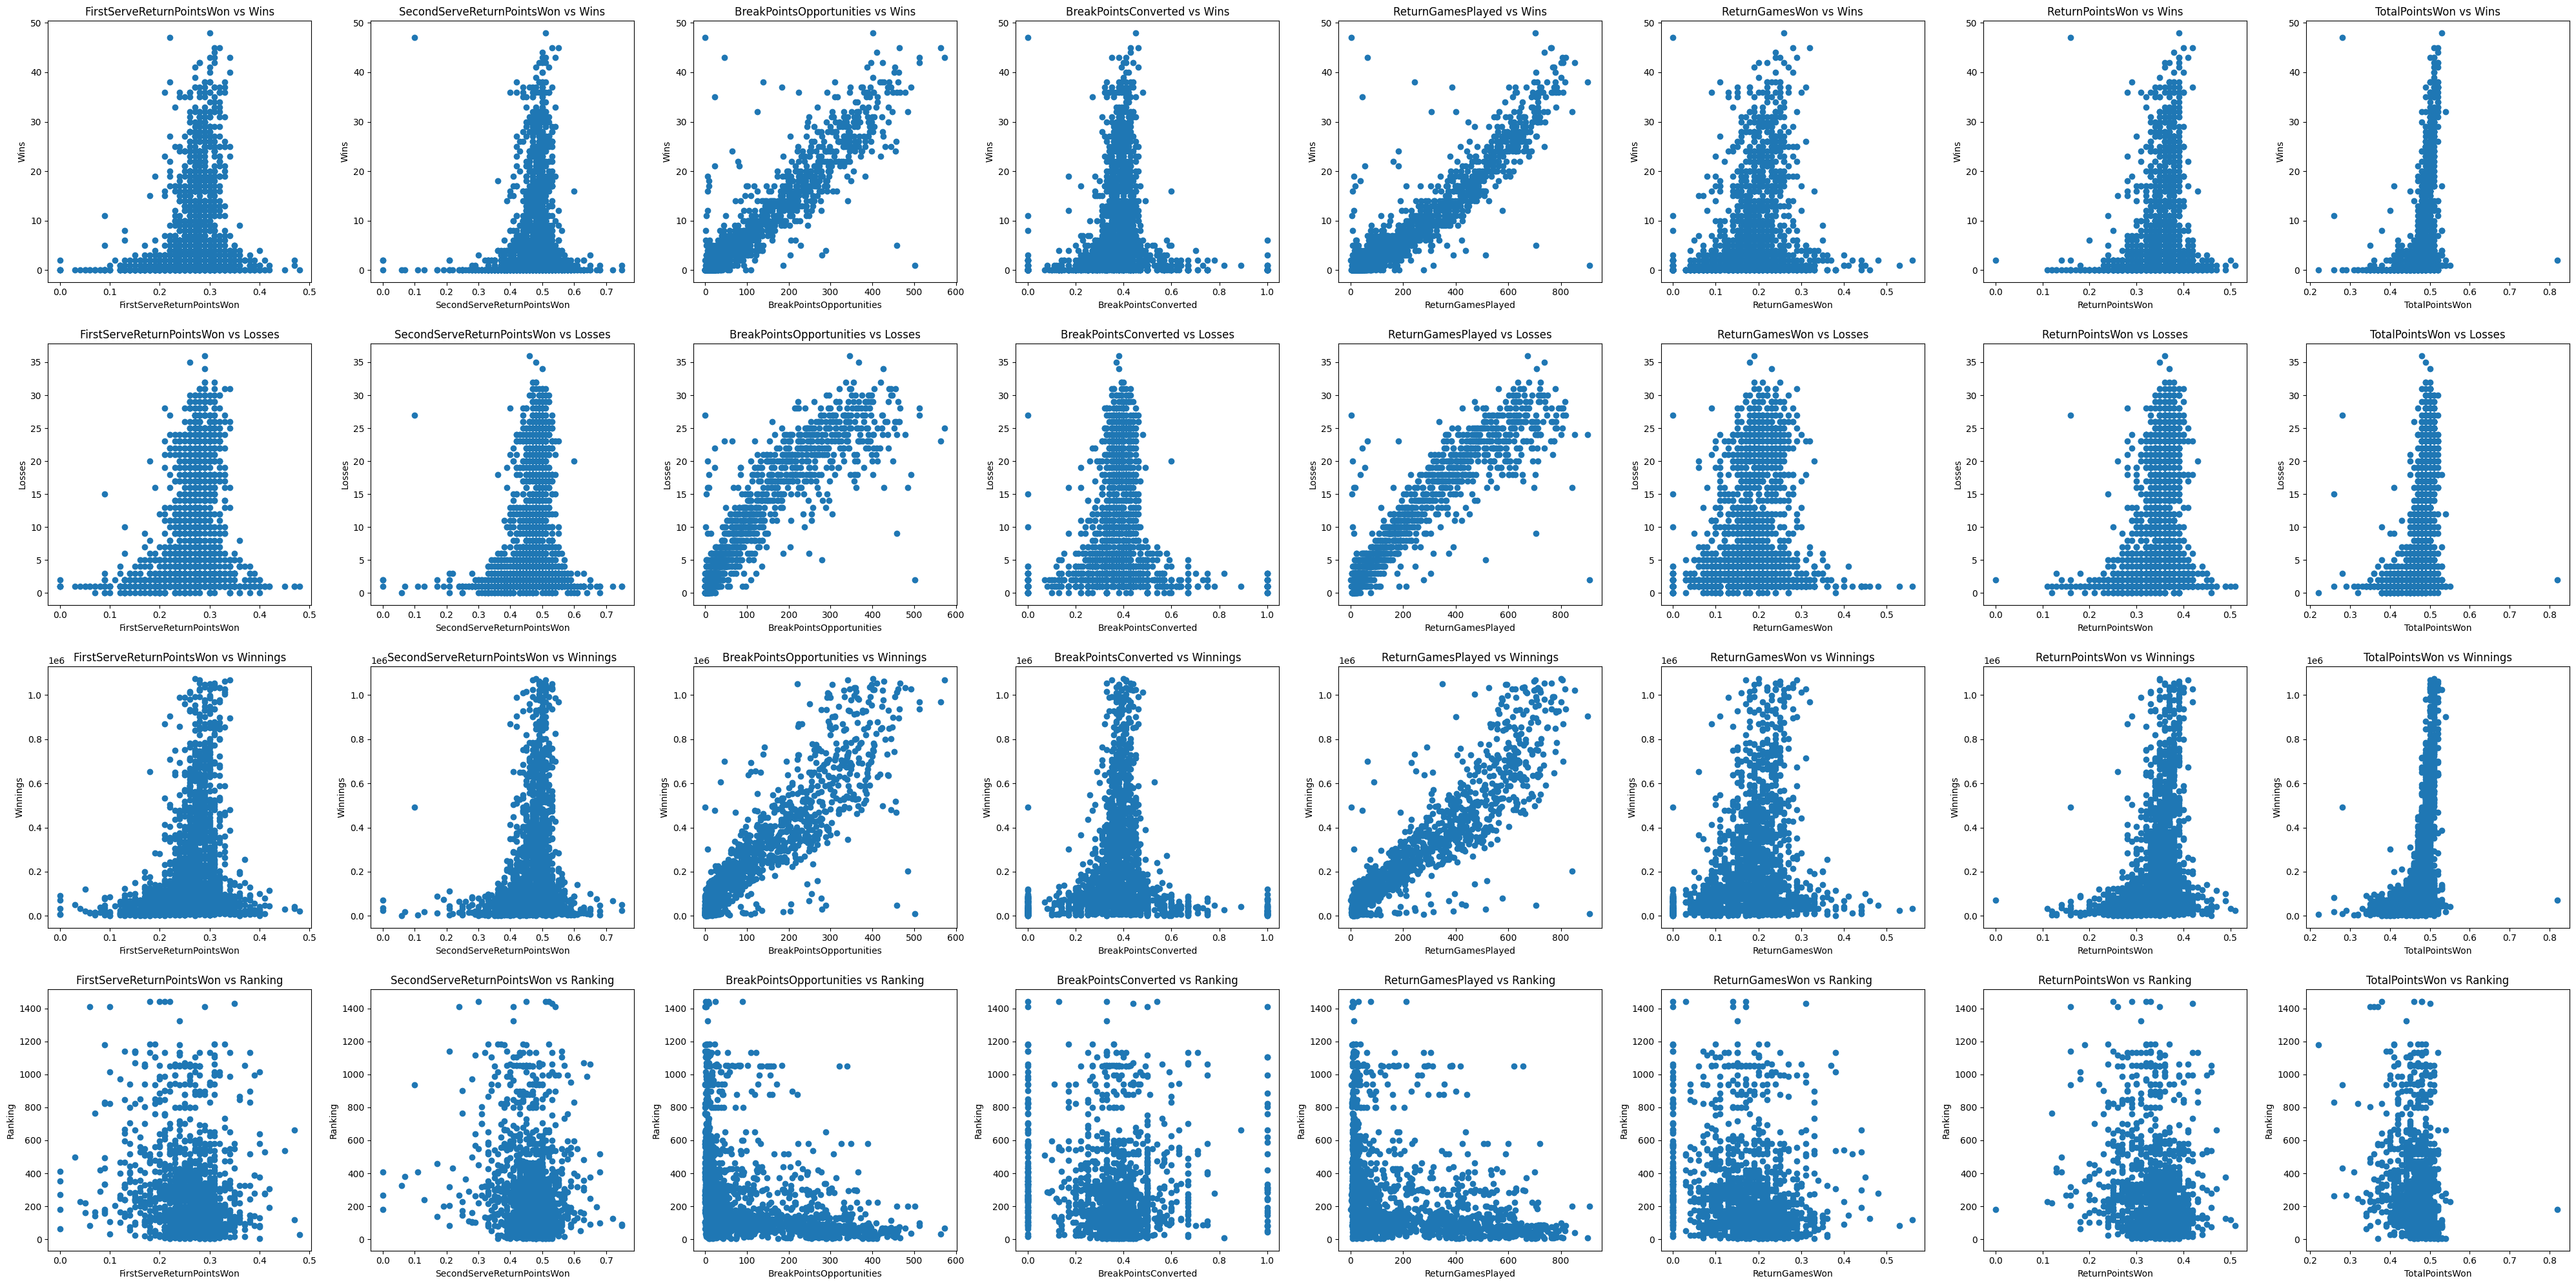

In [12]:
ScatterPlots(return_side, outcomes)

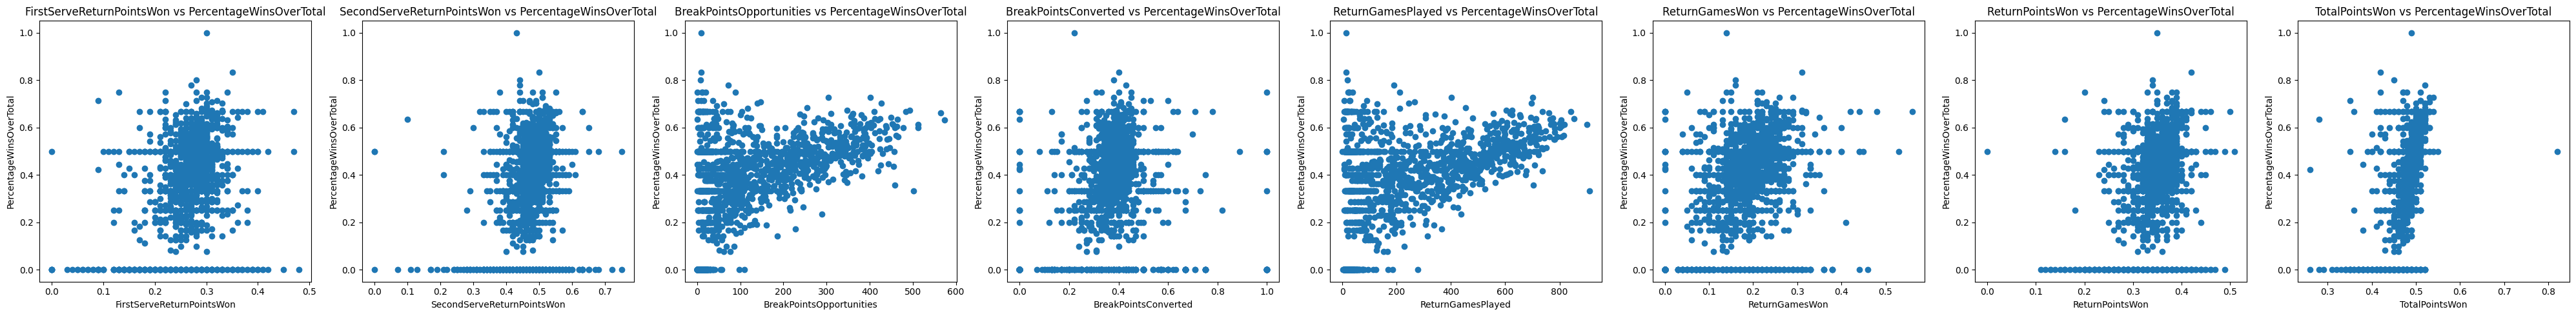

In [14]:
ScatterPlots(return_side, df[["PercentageWinsOverTotal"]].columns)

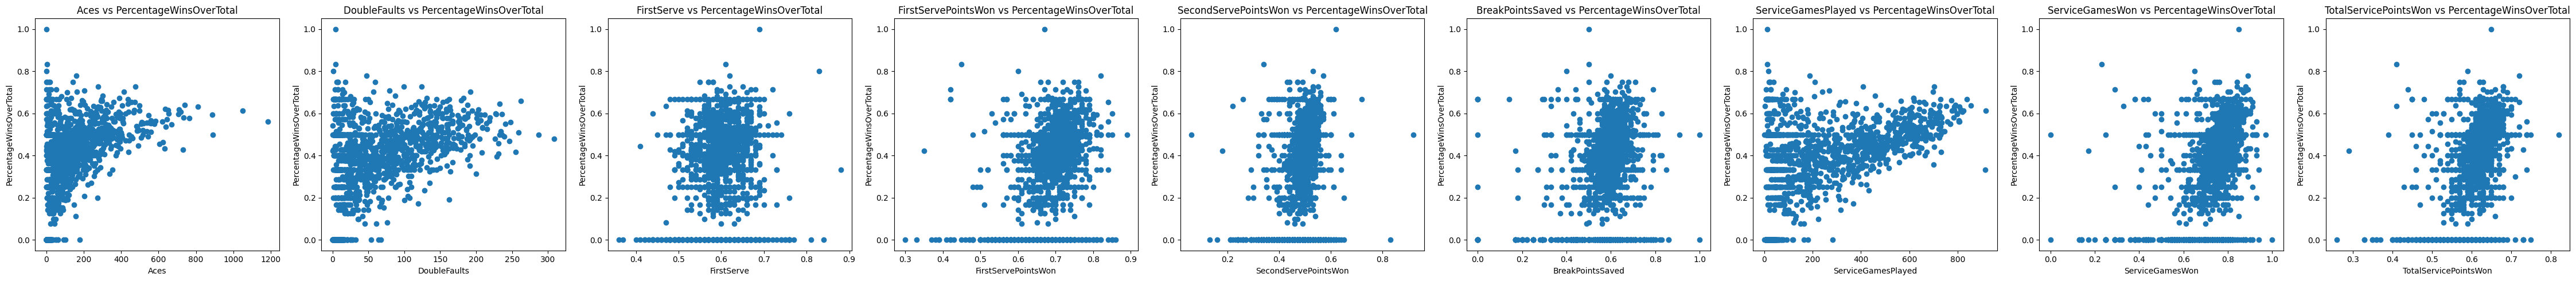

In [15]:
ScatterPlots(service_side, df[["PercentageWinsOverTotal"]].columns)

In [16]:
df["PercentageLossOverTotal"] = df.Losses/(df.Wins + df.Losses)

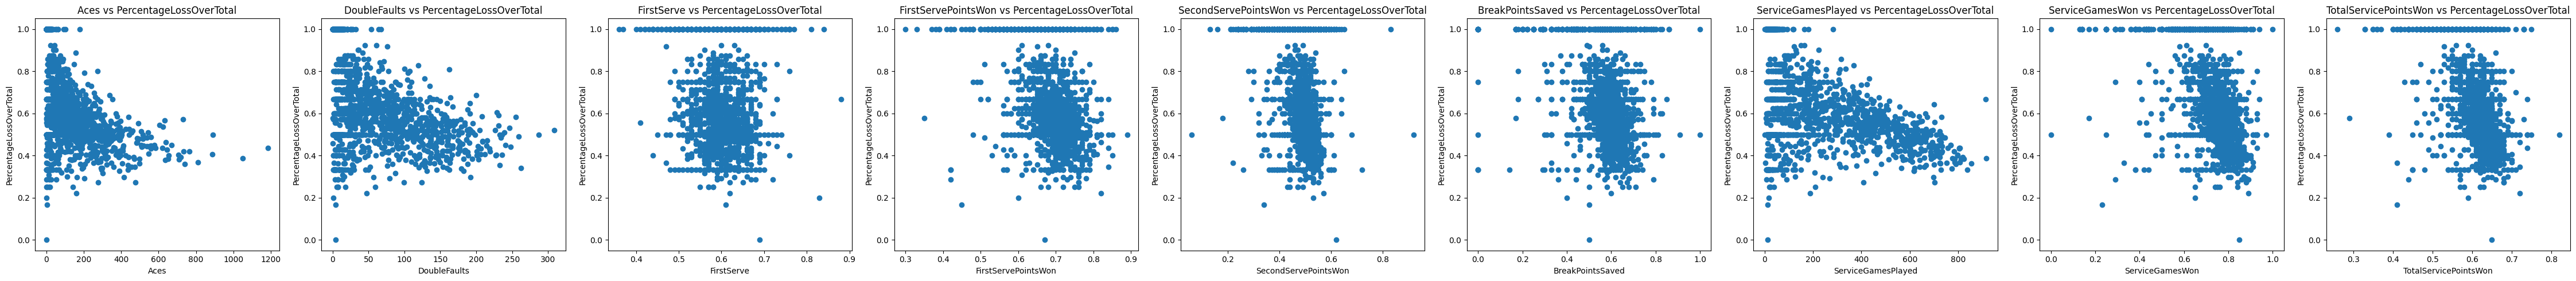

In [17]:
ScatterPlots(service_side, df[["PercentageLossOverTotal"]].columns)

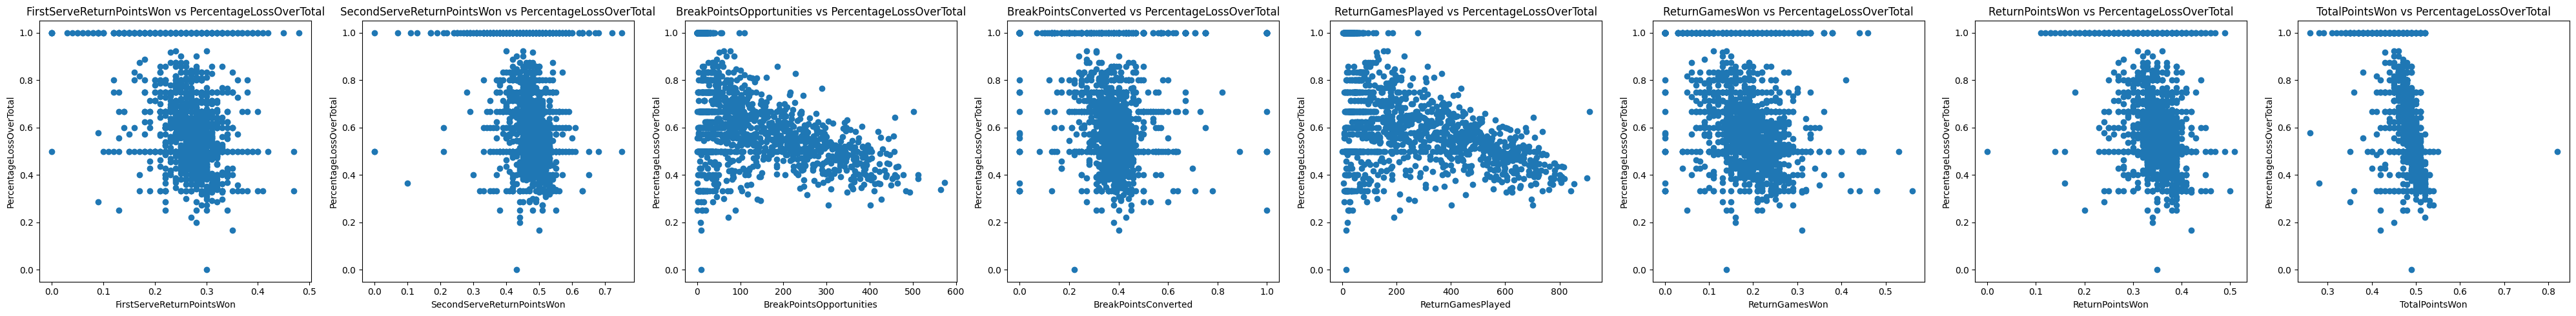

In [18]:
ScatterPlots(return_side, df[["PercentageLossOverTotal"]].columns)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(df[["Aces"]], df[["Winnings"]], test_size=0.2)

In [20]:
slf = LinearRegression()
slf.fit(x_train, y_train)

LinearRegression()

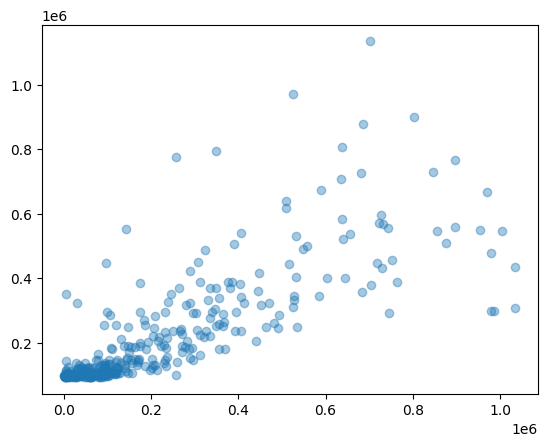

In [21]:
winnings_predict = slf.predict(x_test)
plt.scatter(y_test, winnings_predict, alpha=0.4)
plt.show()

In [22]:
slf.score(x_test,y_test)

0.619282167349203

In [23]:
x_train, x_test, y_train, y_test = train_test_split(df[["DoubleFaults"]], df[["Winnings"]], test_size=0.2)
slf = LinearRegression()
slf.fit(x_train, y_train)
slf.score(x_test,y_test)

0.6893956906197276

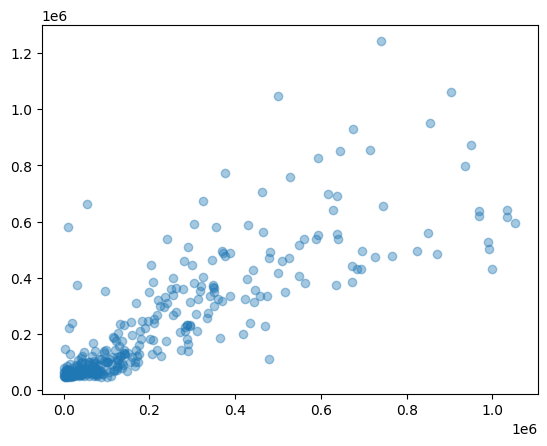

In [24]:
winnings_predict = slf.predict(x_test)
plt.scatter(y_test, winnings_predict, alpha=0.4)
plt.show()

In [25]:
x_train, x_test, y_train, y_test = train_test_split(df[["ServiceGamesPlayed"]], df[["Winnings"]], test_size=0.2)
slf = LinearRegression()
slf.fit(x_train, y_train)
slf.score(x_test,y_test)

0.8140070403313487

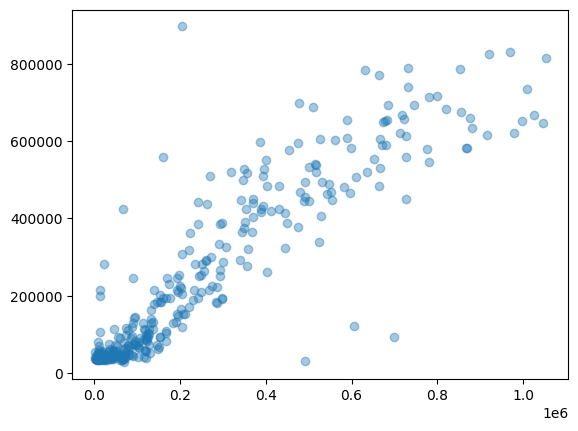

In [26]:
winnings_predict = slf.predict(x_test)
plt.scatter(y_test, winnings_predict, alpha=0.4)
plt.show()

In [27]:
x_train, x_test, y_train, y_test = train_test_split(df[["BreakPointsOpportunities"]], df[["Winnings"]], test_size=0.2)
slf = LinearRegression()
slf.fit(x_train, y_train)
slf.score(x_test,y_test)

0.7898403394127832

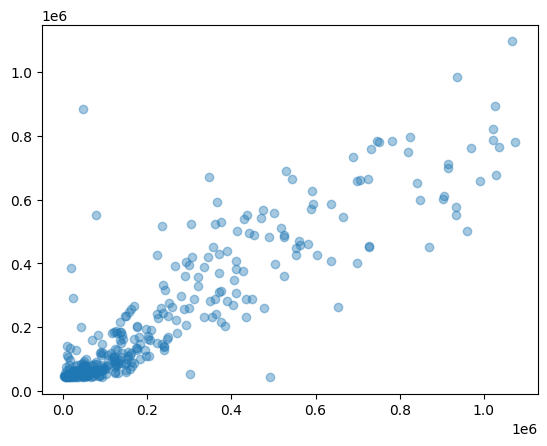

In [28]:
winnings_predict = slf.predict(x_test)
plt.scatter(y_test, winnings_predict, alpha=0.4)
plt.show()

In [29]:
x_train, x_test, y_train, y_test = train_test_split(df[["ReturnGamesPlayed"]], df[["Winnings"]], test_size=0.2)
slf = LinearRegression()
slf.fit(x_train, y_train)
slf.score(x_test,y_test)

0.8133677554083457

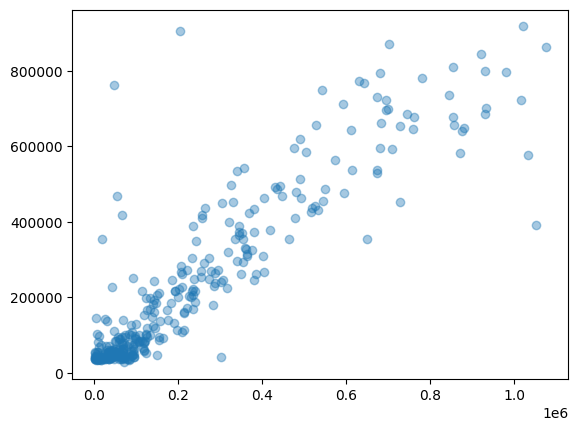

In [30]:
winnings_predict = slf.predict(x_test)
plt.scatter(y_test, winnings_predict, alpha=0.4)
plt.show()

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df[["ReturnGamesPlayed","BreakPointsOpportunities"]], df[["Winnings"]], test_size=0.2)
slf = LinearRegression()
slf.fit(x_train, y_train)
slf.score(x_test,y_test)

0.8341451514234611

In [64]:
x_train, x_test, y_train, y_test = train_test_split(df[["ReturnGamesPlayed","BreakPointsOpportunities", "ServiceGamesPlayed", "TotalPointsWon"]], df[["Winnings"]], test_size=0.2)
slf = LinearRegression()
slf.fit(x_train, y_train)
slf.score(x_test,y_test)

0.8506566033209912

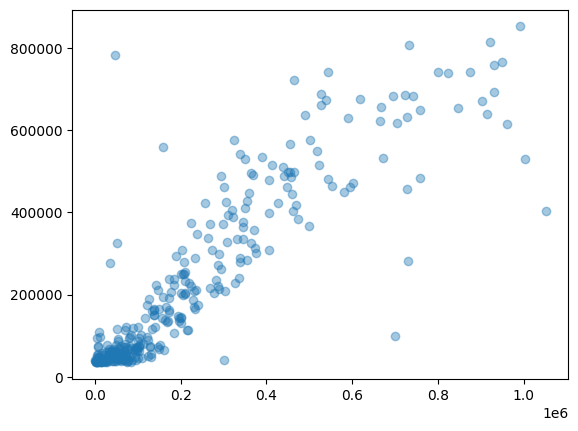

In [33]:
winnings_predict = slf.predict(x_test)
plt.scatter(y_test, winnings_predict, alpha=0.4)
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [35]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1667 entries, 0 to 1720
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1667 non-null   object 
 1   Year                        1667 non-null   int64  
 2   FirstServe                  1667 non-null   float64
 3   FirstServePointsWon         1667 non-null   float64
 4   FirstServeReturnPointsWon   1667 non-null   float64
 5   SecondServePointsWon        1667 non-null   float64
 6   SecondServeReturnPointsWon  1667 non-null   float64
 7   Aces                        1667 non-null   int64  
 8   BreakPointsConverted        1667 non-null   float64
 9   BreakPointsFaced            1667 non-null   int64  
 10  BreakPointsOpportunities    1667 non-null   int64  
 11  BreakPointsSaved            1667 non-null   float64
 12  DoubleFaults                1667 non-null   int64  
 13  ReturnGamesPlayed           1667 

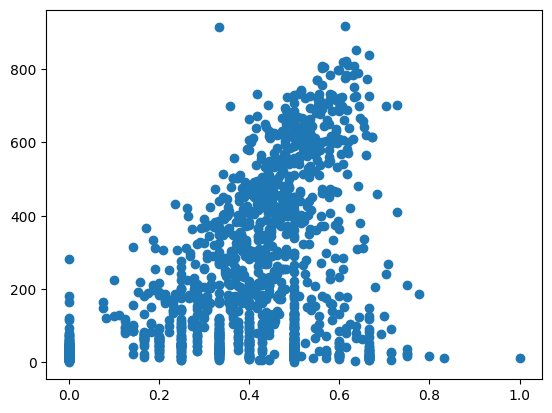

In [36]:
df_noNA = df.dropna()
plt.scatter(df_noNA[["PercentageWinsOverTotal"]], df_noNA[["ServiceGamesPlayed"]])
plt.show()

In [44]:
x_train, x_test, y_train, y_test = train_test_split(df_noNA[["ReturnGamesPlayed","BreakPointsOpportunities", "ServiceGamesPlayed", "Aces", "DoubleFaults", "TotalPointsWon"]], df_noNA[["PercentageWinsOverTotal"]], test_size=0.2)
slf = LinearRegression()
slf.fit(x_train, y_train)
slf.score(x_test,y_test)

0.4472819785672819